## torchvision transform

In train, data processing consist of followings:
- Resize & Crop (train_image_size, random_crop_ratio)
- Horizontal Fliping (horizontal_flip_prob)
- RandAugmentation (aa, rand, trival)
- Normalize (mean, std)
- Random Erasing (rand erasing prob)

In evalutation, data processing consists of followings:
- Resize & Crop (eval_image_size, eval_crop_ratio)
- Normalization (mean, std)

In [32]:
import PIL.Image as Image
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import os

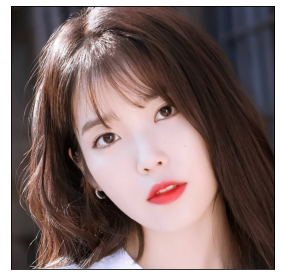

In [33]:
def show_img(img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

img = Image.open('../sample_img/iu.jpg')
show_img(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


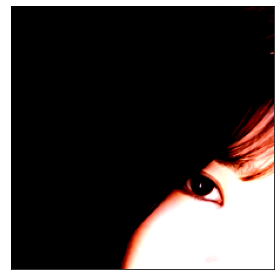

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


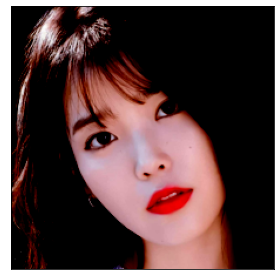

In [57]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.autoaugment.TrivialAugmentWide(),
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    transforms.RandomErasing(),
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
])

x_train = train_transform(img).permute(1, 2, 0).numpy()
show_img(x_train)

x_test = test_transform(img).permute(1, 2, 0).numpy()
show_img(x_test)